<a href="https://colab.research.google.com/github/Feeder013/Colab-Python-projects/blob/main/Health_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
forest = pd.read_excel(r'/var/forest_health_data_with_target.xlsx',index_col = 'Plot_ID')
pd.set_option('display.max_rows', 1000)
forest

,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
Plot_ID,,,,,,,,,,,,,,,,,,,
1,24.981605,-117.040695,29.862040,20.835684,6.147963,4.542720,29.171563,212.518419,30.209377,93.086241,0.379904,0.268850,0.328882,0.487287,0.682938,2.998681,0.004402,0.812948,Healthy
2,48.028572,-92.066934,28.462986,24.307079,8.248891,5.260921,7.757386,641.640332,29.054905,62.028839,0.339583,0.073260,0.044616,0.013501,0.723696,3.986987,0.000330,0.678542,Very Healthy
3,39.279758,-68.893791,91.094185,9.013101,7.841448,8.690927,39.257755,2510.612835,8.351397,77.992822,0.184392,0.297665,0.124953,0.474088,2.129934,3.250667,0.472263,0.889075,Healthy
4,33.946339,-78.744258,28.706889,19.496475,2.385099,4.060039,27.590231,2323.628233,37.290034,54.883864,0.611194,0.160819,0.387971,0.187495,1.717352,1.333210,0.029294,0.449336,Unhealthy
5,16.240746,-73.540720,30.835224,18.008888,2.343245,8.826847,7.074175,1116.863805,24.896527,70.402766,0.481858,0.030913,0.266699,0.009995,2.476038,1.742321,0.974533,0.893890,Unhealthy
6,16.239781,-83.885164,77.142835,25.319251,3.413569,1.793210,43.305213,1192.750821,17.730393,47.246075,0.867044,0.474585,0.464345,0.346133,2.790677,1.877313,0.222065,0.865774,Healthy
7,12.323344,-81.540640,47.725285,27.370438,4.249673,7.991186,23.326446,1647.307857,31.478850,44.092722,0.041788,0.322538,0.217232,0.490367,1.470917,2.031457,0.472665,0.438409,Healthy
8,44.647046,-70.556304,78.787503,2.340390,4.676100,8.627929,3.280430,100.698914,14.007791,66.258383,0.647429,0.439075,0.435557,0.482985,1.991025,3.261614,0.061138,0.381143,Healthy
9,34.044600,-112.523239,11.209785,20.872558,7.117275,2.636359,28.207481,799.608575,29.272844,59.850374,0.765319,0.339648,0.227233,0.084664,1.751742,3.015863,0.522048,0.932812,Healthy


In [6]:
forest.describe()

,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,29.610262,-94.508789,52.728544,15.730501,5.446948,5.486180,22.198898,1498.874791,22.027384,59.743599,0.510635,0.255100,0.251220,0.249344,1.762232,2.963965,0.512124,0.509207
std,11.685494,20.453293,27.614049,8.021702,2.581289,2.602753,13.038014,826.251755,9.878208,22.572259,0.283588,0.146605,0.142471,0.145486,0.724376,1.163286,0.287952,0.281458
min,10.185281,-129.774722,5.001105,2.018295,1.000276,1.055654,0.064275,100.698914,5.008503,20.004226,0.010934,0.005078,0.005596,0.005660,0.503300,1.001239,0.000252,0.000854
25%,19.438931,-113.124801,29.828343,8.773222,3.204766,3.244420,10.809975,784.368948,13.728430,41.131530,0.260105,0.130452,0.127690,0.121242,1.136698,1.947451,0.270524,0.277123
50%,29.872295,-93.688627,52.558322,15.559820,5.451383,5.413625,21.808936,1503.573023,21.754533,59.614944,0.511302,0.249754,0.247471,0.243803,1.752412,2.969374,0.523023,0.516489
75%,39.772784,-76.767446,77.114835,22.651143,7.659941,7.658666,34.040896,2171.952127,30.056674,78.897379,0.759135,0.387961,0.377836,0.377283,2.421229,3.987144,0.750194,0.746163
max,49.988707,-60.041039,99.792981,29.987616,9.979745,9.994153,44.975731,2996.823629,39.860447,99.960415,0.999676,0.499671,0.499356,0.499428,2.999513,4.999699,0.999150,0.997163


In [7]:
sns.reset_orig()

In [8]:
forest.duplicated().value_counts()
#forest.duplicated(keep=False)

,count
False,1000


In [9]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Latitude                 1000 non-null   float64
 1   Longitude                1000 non-null   float64
 2   DBH                      1000 non-null   float64
 3   Tree_Height              1000 non-null   float64
 4   Crown_Width_North_South  1000 non-null   float64
 5   Crown_Width_East_West    1000 non-null   float64
 6   Slope                    1000 non-null   float64
 7   Elevation                1000 non-null   float64
 8   Temperature              1000 non-null   float64
 9   Humidity                 1000 non-null   float64
 10  Soil_TN                  1000 non-null   float64
 11  Soil_TP                  1000 non-null   float64
 12  Soil_AP                  1000 non-null   float64
 13  Soil_AN                  1000 non-null   float64
 14  Menhinick_Index          1000

<Axes: title={'center': 'Distribution of Health Status'}, xlabel='Health_Status'>

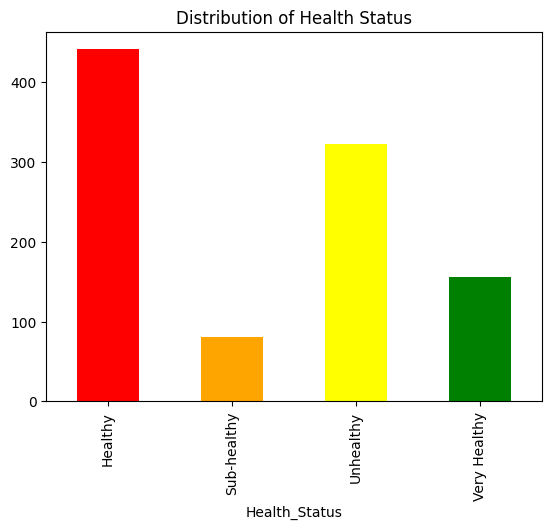

In [10]:
health = forest.groupby('Health_Status')['Latitude'].count()
color = ['red', 'orange', 'yellow', 'green', 'blue','purple','brown']
health.plot(kind='bar', label='Health_Status', title='Distribution of Health Status', color=color)


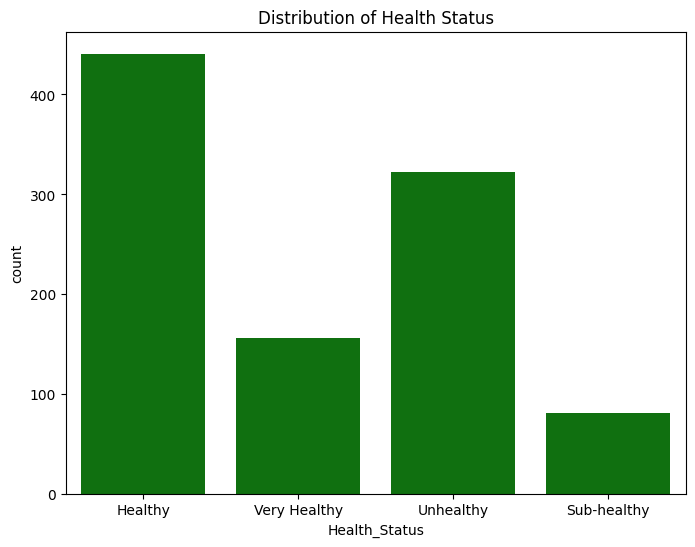

In [11]:
plt.figure(figsize=(8, 6))
color = ['red', 'orange', 'yellow', 'green', 'blue','purple','brown']
sns.countplot(x='Health_Status', data=forest, color='green')
plt.title('Distribution of Health Status')
plt.show()

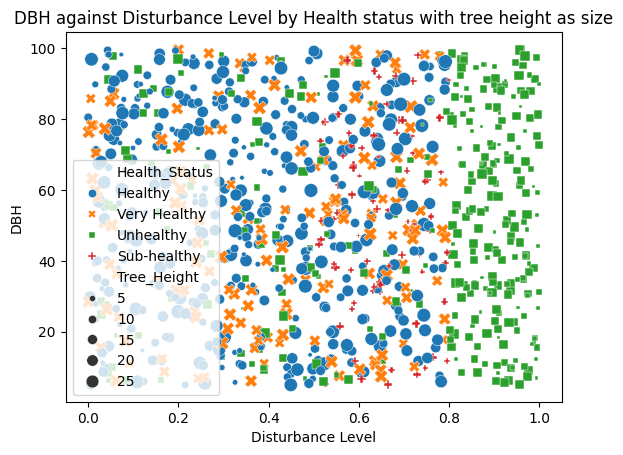

In [12]:
forest.head()
sns.scatterplot(x='Disturbance_Level', y='DBH', data=forest, hue='Health_Status', size='Tree_Height', sizes=(10,100),style='Health_Status')
plt.title('DBH against Disturbance Level by Health status with tree height as size')
plt.xlabel('Disturbance Level')
plt.ylabel('DBH')
plt.show()

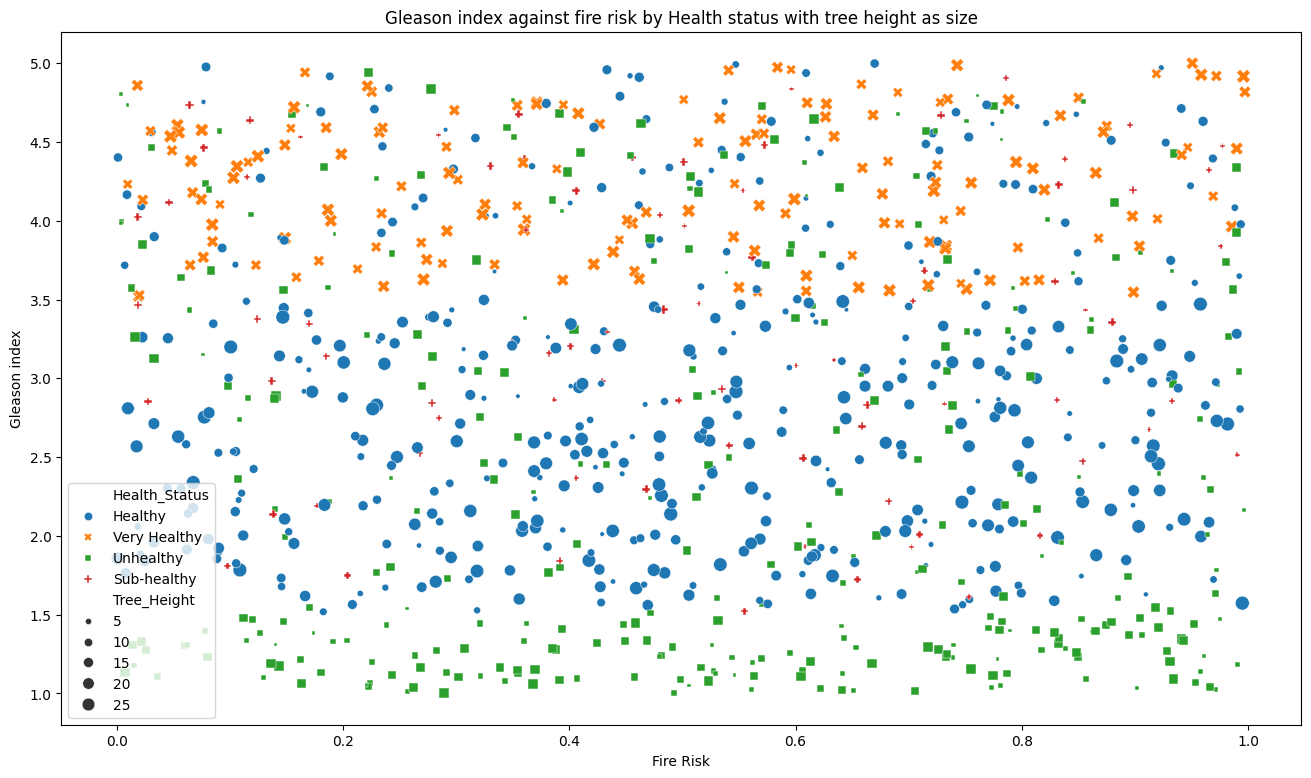

In [15]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='Fire_Risk_Index', y='Gleason_Index', data=forest, hue='Health_Status', size='Tree_Height', sizes=(10,100),style='Health_Status')
plt.title('Gleason index against fire risk by Health status with tree height as size')
plt.xlabel('Fire Risk')
plt.ylabel('Gleason index')
plt.show()

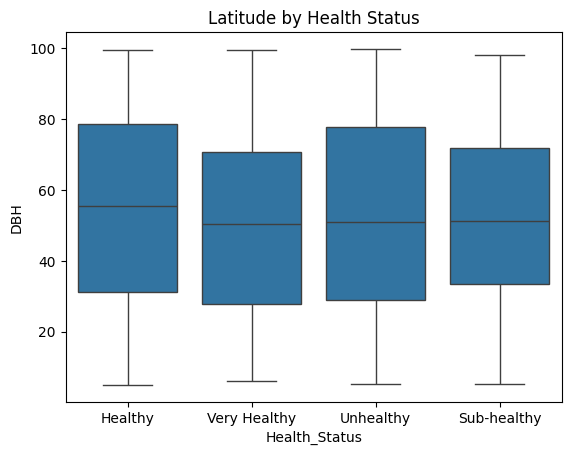

In [17]:
sns.boxplot(x='Health_Status', y='DBH', data=forest)
plt.title('Latitude by Health Status')
plt.show()

<Axes: >

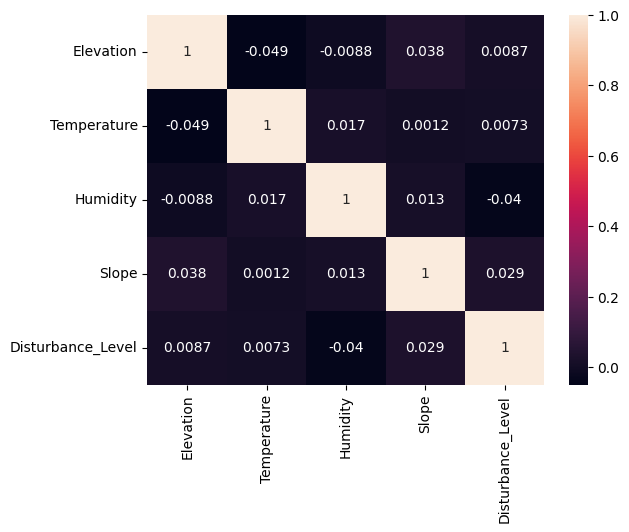

In [27]:
forest.head()
correlation = forest[['Elevation','Temperature','Humidity','Slope','Disturbance_Level']]
correlation.corr(method='pearson')
sns.heatmap(correlation.corr(), annot=True)

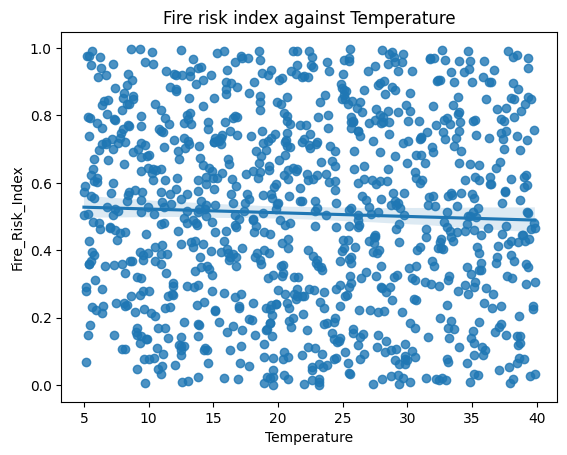

In [33]:
sns.regplot(x='Temperature', y='Fire_Risk_Index', data=forest)
plt.title('Fire risk index against Temperature')
plt.show()